# Code Derived Captions 数据集分析

这个notebook用于分析code_derived_captions数据集。该数据集包含从代码生成的描述性文本，用于训练视觉语言模型理解代码相关图像。

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 设置数据集路径
DATASET_PATH = "/Users/jia/datasets/data/code_derived_captions/train"

print("正在检查数据集...")
if not os.path.exists(DATASET_PATH):
    print(f"错误: 数据集路径 {DATASET_PATH} 不存在")
else:
    print(f"数据集路径: {DATASET_PATH}")

正在检查数据集...
数据集路径: /Users/jia/datasets/data/code_derived_captions/train


In [5]:
# 列出所有数据文件
files = os.listdir(DATASET_PATH)
parquet_files = [f for f in files if f.endswith(".parquet")]

print(f"\n数据文件总数: {len(files)}")
print(f"Parquet文件数量: {len(parquet_files)}")
print(f"\n前10个文件:")
for file in parquet_files[:10]:
    print(f"  - {file}")


数据文件总数: 254
Parquet文件数量: 254

前10个文件:
  - train-00207-of-00254.parquet
  - train-00239-of-00254.parquet
  - train-00004-of-00254.parquet
  - train-00103-of-00254.parquet
  - train-00087-of-00254.parquet
  - train-00061-of-00254.parquet
  - train-00166-of-00254.parquet
  - train-00158-of-00254.parquet
  - train-00180-of-00254.parquet
  - train-00179-of-00254.parquet


In [6]:
# 加载第一个parquet文件
if parquet_files:
    first_file = os.path.join(DATASET_PATH, parquet_files[0])
    print(f"\n正在加载文件: {first_file}")
    df = pd.read_parquet(first_file)
    print(f"数据集形状: {df.shape}")
    print(f"列名: {list(df.columns)}")


正在加载文件: /Users/jia/datasets/data/code_derived_captions/train/train-00207-of-00254.parquet
数据集形状: (15976, 4)
列名: ['id', 'code', 'caption', 'image']


In [7]:
# 显示数据集基本信息
if 'df' in locals():
    print("\n数据集基本信息:")
    print(df.info())


数据集基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15976 entries, 0 to 15975
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       15976 non-null  object
 1   code     15976 non-null  object
 2   caption  15976 non-null  object
 3   image    15976 non-null  object
dtypes: object(4)
memory usage: 499.4+ KB
None


In [9]:
# 显示数据集前5行
if 'df' in locals():
    print("\n数据集前5行:")
    display(df.head()) 


数据集前5行:


,id,code,caption,image
0,tikz_2731347,```latex\n\documentclass[12pt]{article}\n\usep...,The image depicts a complex geometric arrangem...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
1,tikz_353835,```latex\n\documentclass[12pt]{article}\n\usep...,The image depicts a geometric configuration co...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
2,tikz_787751,"```latex\n\documentclass[tikz,border=3.14mm]{s...",The image depicts a geometric configuration in...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
3,python_1457840,```python\nimport matplotlib.pyplot as plt\nim...,"The image depicts two triangles, ΔABC and ΔAC'...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
4,tikz_2266387,"```latex\n\documentclass[tikz,border=3.14mm]{s...",The image consists of a large square divided i...,{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...


In [6]:
# 检查数据集中的缺失值
if 'df' in locals():
    print("\n缺失值统计:")
    print(df.isnull().sum())


缺失值统计:
id         0
code       0
caption    0
image      0
dtype: int64



caption长度统计:
count    15976.000000
mean      1714.891337
std        486.719277
min        274.000000
25%       1403.000000
50%       1648.000000
75%       1976.000000
max       4082.000000
Name: caption_length, dtype: float64


/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 39057 (\N{CJK UNIFIED IDEOGRAPH-9891}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jia/workspace/.venv/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998

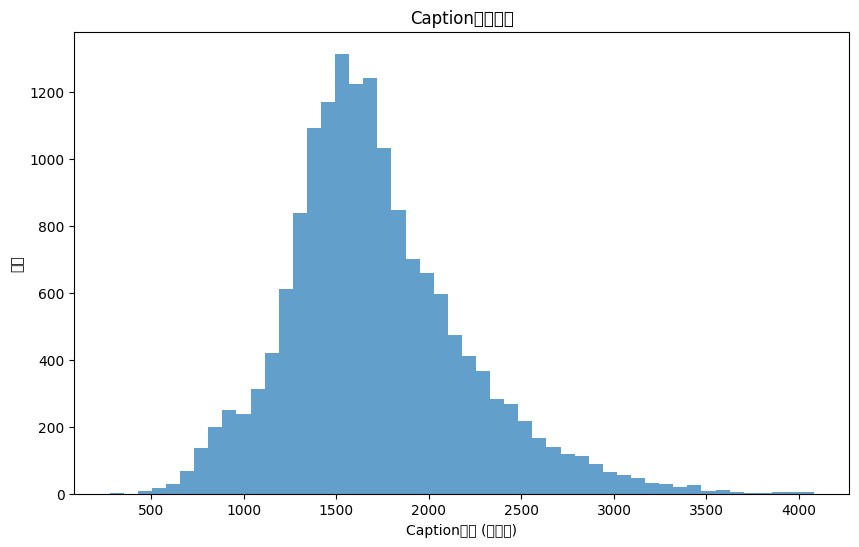

In [7]:
# 分析caption的长度
if 'df' in locals() and 'caption' in df.columns:
    df['caption_length'] = df['caption'].str.len()
    
    print("\ncaption长度统计:")
    print(df['caption_length'].describe())
    
    # 绘制caption长度分布直方图
    plt.figure(figsize=(10, 6))
    plt.hist(df['caption_length'], bins=50, alpha=0.7)
    plt.title('Caption长度分布')
    plt.xlabel('Caption长度 (字符数)')
    plt.ylabel('频次')
    plt.show()

In [12]:
# 显示一些样本数据
print("\n样本数据:")
if 'df' in locals():
    sample_size = min(5, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    for i in range(len(sample_df)):
        print(f"\n样本 {i+1}:")
        row = sample_df.iloc[i]
        
        if 'repo_name' in row:
            print(f"  仓库名称: {row['repo_name']}")
        if 'language' in row:
            print(f"  编程语言: {row['language']}")
        if 'caption' in row:
            caption = row['caption']
            print(f"  描述: {caption[:300]}{'...' if len(caption) > 300 else ''}")
        if 'image' in row:
            image = row['image']
            if image is not None and not (isinstance(image, (list, np.ndarray)) and len(image) == 0):
                print(f"  图像信息: 存在")
            else:
                print(f"  图像信息: 不存在")


样本数据:

样本 1:
  描述: The image depicts a geometric arrangement consisting of two overlapping gray triangles and a black circle. The triangles share a common vertex at point \( O \), which is located at the top of the circle. The first triangle, \( \triangle ABO \), has vertices at points \( A \), \( B \), and \( O \). T...
  图像信息: 存在

样本 2:
  描述: The image depicts a geometric configuration involving four points labeled \( o \), \( p \), \( q \), and \( r \). These points form a quadrilateral with the following properties:

- Point \( o \) is located at the bottom-left corner of the quadrilateral.
- Point \( p \) is positioned above and to th...
  图像信息: 存在

样本 3:
  描述: The image depicts a coordinate plane with the horizontal axis labeled \( t \) and the vertical axis labeled \( s \). The origin, denoted as \( O \), is located at the intersection of these axes. A dashed horizontal line extends from the vertical axis at \( s = 30 \) to a point on the curve, and a da...
  图像信息: 存在

样本 4:
  

In [13]:
# 显示样本数据中的code、image和caption
print("\n详细样本数据展示:")
if 'df' in locals():
    sample_size = min(3, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    for i in range(len(sample_df)):
        print(f"\n{'='*60}")
        print(f"样本 {i+1}")
        print(f"{'='*60}")
        row = sample_df.iloc[i]
        
        # 显示ID
        if 'id' in row:
            print(f"ID: {row['id']}")
        
        # 显示caption
        if 'caption' in row:
            caption = row['caption']
            print(f"\nCaption (描述文本):")
            print("-" * 20)
            print(f"{caption[:500]}{'...' if len(caption) > 500 else ''}")
            print(f"(总长度: {len(caption)} 字符)")
        
        # 显示code
        if 'code' in row:
            code = row['code']
            print(f"\nCode (代码):")
            print("-" * 10)
            # 限制显示的代码长度，避免输出过长
            print(f"{code[:800]}{'...' if len(code) > 800 else ''}")
            if len(code) > 800:
                print(f"(代码总长度: {len(code)} 字符)")
        
        # 显示图像信息
        if 'image' in row:
            image = row['image']
            print(f"\nImage (图像信息):")
            print("-" * 15)
            if image is not None and not (isinstance(image, (list, np.ndarray)) and len(image) == 0):
                if isinstance(image, dict):
                    print(f"图像数据类型: 字典")
                    print(f"键值: {list(image.keys())}")
                    for key, value in image.items():
                        if isinstance(value, (list, np.ndarray)):
                            print(f"  {key}: 数组, 形状 {np.array(value).shape}")
                        else:
                            print(f"  {key}: {type(value).__name__}, 值: {str(value)[:100]}{'...' if len(str(value)) > 100 else ''}")
                elif isinstance(image, (list, np.ndarray)):
                    arr = np.array(image)
                    print(f"图像数据类型: 数组")
                    print(f"形状: {arr.shape}")
                    print(f"数据类型: {arr.dtype}")
                    if arr.size > 0:
                        print(f"数值范围: {arr.min()} 到 {arr.max()}")
                else:
                    print(f"图像数据类型: {type(image).__name__}")
                    print(f"值: {str(image)[:200]}{'...' if len(str(image)) > 200 else ''}")
            else:
                print("图像数据不存在或为空")


详细样本数据展示:

样本 1
ID: python_2777580

Caption (描述文本):
--------------------
The image depicts a geometric arrangement consisting of two overlapping gray triangles and a black circle. The triangles share a common vertex at point \( O \), which is located at the top of the circle. The first triangle, \( \triangle ABO \), has vertices at points \( A \), \( B \), and \( O \). The second triangle, \( \triangle BCO \), has vertices at points \( B \), \( C \), and \( O \). Both triangles are shaded in gray with a transparency that allows the underlying elements to be visible.
...
(总长度: 2053 字符)

Code (代码):
----------
```python
import matplotlib.pyplot as plt
import numpy as np

# Define the points
P = np.array([0, 0])
B = np.array([1, 0])
C = np.array([2, 0])
O = np.array([1, 1])
A = np.array([0.5, 1.5])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Draw the triangle and circle
triangle1 = plt.Polygon([A, B, O], color='gray', alpha=0.5)
triangle2 = plt.Polygon([B, C, O],


图像可视化:


/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_19365/432711698.py:46: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_19365/432711698.py:46: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_19365/432711698.py:46: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/02/ds48z4ms1p549v4bjkpv1dmc0000gn/T/ipykernel_19365/432711698.py:46: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


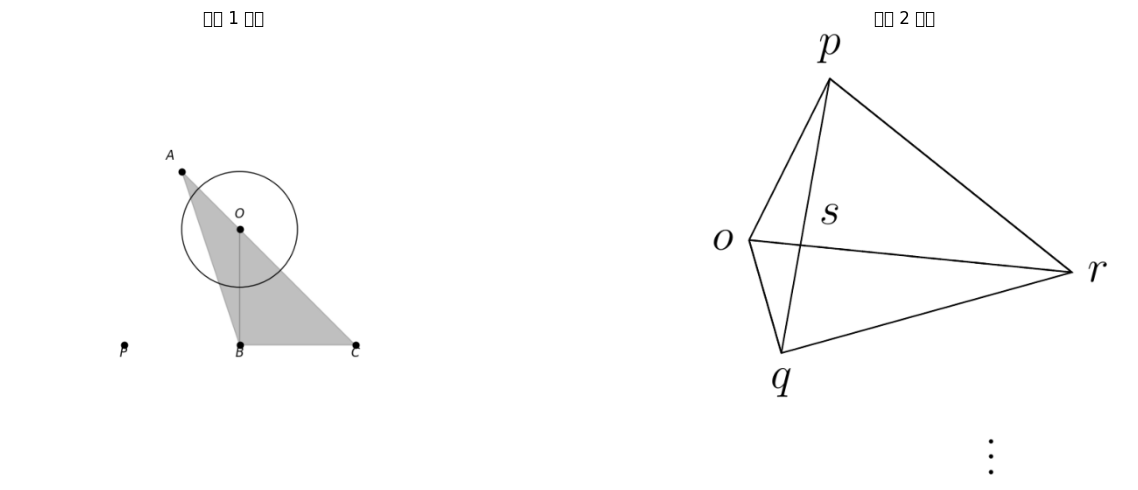

In [15]:
# 改进的图像可视化函数
def display_sample_images(df, num_samples=2):
    """
    显示样本图像
    """
    try:
        import matplotlib.pyplot as plt
        from PIL import Image
        import io
        sample_df = df.sample(n=min(num_samples, len(df)), random_state=42)
        
        fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
        if num_samples == 1:
            axes = [axes]
            
        for i in range(len(sample_df)):
            row = sample_df.iloc[i]
            if 'image' in row and row['image'] is not None:
                image_data = row['image']
                if isinstance(image_data, dict) and 'bytes' in image_data:
                    # 从字典中提取图像字节数据
                    img_bytes = image_data['bytes']
                    try:
                        # 将字节数据转换为图像
                        img_buffer = io.BytesIO(img_bytes)
                        img = Image.open(img_buffer)
                        
                        # 显示图像
                        axes[i].imshow(img)
                        axes[i].set_title(f"样本 {i+1} 图像")
                    except Exception as e:
                        axes[i].text(0.5, 0.5, f'图像解码失败\n{str(e)[:30]}', 
                                    ha='center', va='center', transform=axes[i].transAxes)
                        axes[i].set_title(f"样本 {i+1} 图像错误")
                else:
                    axes[i].text(0.5, 0.5, '图像数据格式不正确', 
                                ha='center', va='center', transform=axes[i].transAxes)
                    axes[i].set_title(f"样本 {i+1}")
            else:
                axes[i].text(0.5, 0.5, '无图像数据', 
                            ha='center', va='center', transform=axes[i].transAxes)
                axes[i].set_title(f"样本 {i+1}")
            
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    except ImportError as e:
        print(f"相关库未安装，无法显示图像: {e}")
    except Exception as e:
        print(f"显示图像时出错: {e}")

# 显示样本图像
print("\n图像可视化:")
if 'df' in locals():
    display_sample_images(df, num_samples=2)

In [16]:
# 添加数据统计信息
print("\n数据统计信息:")
print("="*50)
if 'df' in locals():
    print(f"总样本数: {len(df)}")
    
    # Caption长度统计
    if 'caption' in df.columns:
        df['caption_length'] = df['caption'].str.len()
        print(f"\nCaption长度统计:")
        print(f"  平均长度: {df['caption_length'].mean():.2f} 字符")
        print(f"  最小长度: {df['caption_length'].min()} 字符")
        print(f"  最大长度: {df['caption_length'].max()} 字符")
        print(f"  长度中位数: {df['caption_length'].median()} 字符")
    
    # Code长度统计
    if 'code' in df.columns:
        df['code_length'] = df['code'].str.len()
        print(f"\nCode长度统计:")
        print(f"  平均长度: {df['code_length'].mean():.2f} 字符")
        print(f"  最小长度: {df['code_length'].min()} 字符")
        print(f"  最大长度: {df['code_length'].max()} 字符")
        print(f"  长度中位数: {df['code_length'].median()} 字符")
    
    # 图像数据统计
    if 'image' in df.columns:
        # 统计有图像数据的样本数
        has_image = df['image'].apply(lambda x: x is not None and not (isinstance(x, (list, np.ndarray)) and len(x) == 0))
        count_with_image = has_image.sum()
        print(f"\n图像数据统计:")
        print(f"  有图像数据的样本数: {count_with_image}")
        print(f"  无图像数据的样本数: {len(df) - count_with_image}")
        print(f"  图像数据覆盖率: {count_with_image/len(df)*100:.2f}%")


数据统计信息:
总样本数: 15976

Caption长度统计:
  平均长度: 1714.89 字符
  最小长度: 274 字符
  最大长度: 4082 字符
  长度中位数: 1648.0 字符

Code长度统计:
  平均长度: 1187.77 字符
  最小长度: 195 字符
  最大长度: 3420 字符
  长度中位数: 1152.0 字符

图像数据统计:
  有图像数据的样本数: 15976
  无图像数据的样本数: 0
  图像数据覆盖率: 100.00%


In [ ]:
# 数据集总结
print("\n数据集总结:")
print("="*50)

if 'parquet_files' in locals():
    print(f"总文件数: {len(parquet_files)}")
    
if 'df' in locals():
    print(f"当前加载文件的样本数: {len(df)}")
    print(f"列名: {list(df.columns)}")

print("="*50)
print("分析完成")# 显示样本数据中的code、image和caption
print("\n详细样本数据展示:")
if 'df' in locals():
    sample_size = min(3, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    for i in range(len(sample_df)):
        print(f"\n{'='*60}")
        print(f"样本 {i+1}")
        print(f"{'='*60}")
        row = sample_df.iloc[i]
        
        # 显示ID
        if 'id' in row:
            print(f"ID: {row['id']}")
        
        # 显示caption
        if 'caption' in row:
            caption = row['caption']
            print(f"\nCaption (描述文本):")
            print("-" * 20)
            print(f"{caption[:500]}{'...' if len(caption) > 500 else ''}")
            print(f"(总长度: {len(caption)} 字符)")
        
        # 显示code
        if 'code' in row:
            code = row['code']
            print(f"\nCode (代码):")
            print("-" * 10)
            # 限制显示的代码长度，避免输出过长
            print(f"{code[:800]}{'...' if len(code) > 800 else ''}")
            if len(code) > 800:
                print(f"(代码总长度: {len(code)} 字符)")
        
        # 显示图像信息
        if 'image' in row:
            image = row['image']
            print(f"\nImage (图像信息):")
            print("-" * 15)
            if image is not None and not (isinstance(image, (list, np.ndarray)) and len(image) == 0):
                if isinstance(image, dict):
                    print(f"图像数据类型: 字典")
                    print(f"键值: {list(image.keys())}")
                    for key, value in image.items():
                        if isinstance(value, (list, np.ndarray)):
                            print(f"  {key}: 数组, 形状 {np.array(value).shape}")
                        else:
                            print(f"  {key}: {type(value).__name__}, 值: {str(value)[:100]}{'...' if len(str(value)) > 100 else ''}")
                elif isinstance(image, (list, np.ndarray)):
                    arr = np.array(image)
                    print(f"图像数据类型: 数组")
                    print(f"形状: {arr.shape}")
                    print(f"数据类型: {arr.dtype}")
                    if arr.size > 0:
                        print(f"数值范围: {arr.min()} 到 {arr.max()}")
                else:
                    print(f"图像数据类型: {type(image).__name__}")
                    print(f"值: {str(image)[:200]}{'...' if len(str(image)) > 200 else ''}")
            else:
                print("图像数据不存在或为空")# 显示样本数据中的code、image和caption
print("\n详细样本数据展示:")
if 'df' in locals():
    sample_size = min(3, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    for i in range(len(sample_df)):
        print(f"\n{'='*60}")
        print(f"样本 {i+1}")
        print(f"{'='*60}")
        row = sample_df.iloc[i]
        
        # 显示ID
        if 'id' in row:
            print(f"ID: {row['id']}")
        
        # 显示caption
        if 'caption' in row:
            caption = row['caption']
            print(f"\nCaption (描述文本):")
            print("-" * 20)
            print(f"{caption[:500]}{'...' if len(caption) > 500 else ''}")
            print(f"(总长度: {len(caption)} 字符)")
        
        # 显示code
        if 'code' in row:
            code = row['code']
            print(f"\nCode (代码):")
            print("-" * 10)
            # 限制显示的代码长度，避免输出过长
            print(f"{code[:800]}{'...' if len(code) > 800 else ''}")
            if len(code) > 800:
                print(f"(代码总长度: {len(code)} 字符)")
        
        # 显示图像信息
        if 'image' in row:
            image = row['image']
            print(f"\nImage (图像信息):")
            print("-" * 15)
            if image is not None and not (isinstance(image, (list, np.ndarray)) and len(image) == 0):
                if isinstance(image, dict):
                    print(f"图像数据类型: 字典")
                    print(f"键值: {list(image.keys())}")
                    for key, value in image.items():
                        if isinstance(value, (list, np.ndarray)):
                            print(f"  {key}: 数组, 形状 {np.array(value).shape}")
                        else:
                            print(f"  {key}: {type(value).__name__}, 值: {str(value)[:100]}{'...' if len(str(value)) > 100 else ''}")
                elif isinstance(image, (list, np.ndarray)):
                    arr = np.array(image)
                    print(f"图像数据类型: 数组")
                    print(f"形状: {arr.shape}")
                    print(f"数据类型: {arr.dtype}")
                    if arr.size > 0:
                        print(f"数值范围: {arr.min()} 到 {arr.max()}")
                else:
                    print(f"图像数据类型: {type(image).__name__}")
                    print(f"值: {str(image)[:200]}{'...' if len(str(image)) > 200 else ''}")
            else:
                print("图像数据不存在或为空")


数据集总结:
总文件数: 254
当前加载文件的样本数: 15976
列名: ['id', 'code', 'caption', 'image', 'caption_length']
分析完成
